In [86]:
# 2.1
def get_best_action(actions):
    best_action = 0
    max_action_value = 0
    for i in range(len(actions)):
        cur_action_value = get_action_value(actions[i])
        if cur_action_value > max_action_value:
            best_action = i
            max_action_value = cur_action_value
        return best_action

In [87]:
# 2.2
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

n = 10
probs = np.random.rand(n)  # 生成 n 个在 [0.0, 1.0) 范围内均匀分布的随机数
eps = 0.2      # epsilon probability

In [88]:
# 2.3
def get_reward(prob, n=10):
    reward = 0
    for i in range(n):
        if random.random() < prob:
            reward += 1
    return reward

In [89]:
# 2.4
record = np.zeros((n,2))
def update_record(record, action, r):
    new_r = (record[action, 0] * record[action, 1] + r) / (record[action, 0] + 1)
    record[action, 0] += 1
    record[action, 1] = new_r
    return record

In [90]:
# 2.5
def get_best_arm(record):
    arm_index = np.argmax(record[:,1], axis=0)  # arm_index 将包含 record 数组中第二列中最大元素所在的行索引
    return arm_index

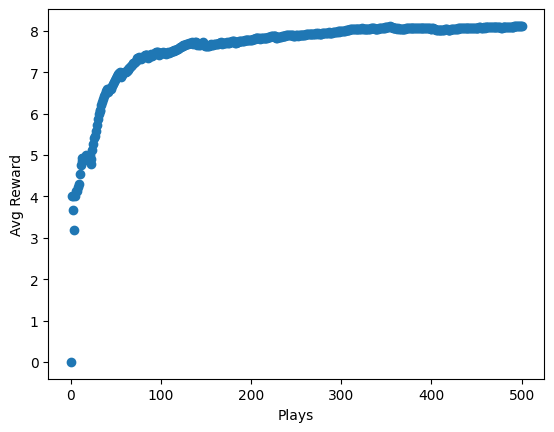

In [91]:
# 2.6
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Plays')  # 设置 x 轴标签为 "Plays"
ax.set_ylabel('Avg Reward')  # 设置 y 轴标签为 "Avg Reward"
record = np.zeros((n, 2))  # 创建一个形状为 (n, 2) 的全零数组，用于记录每个动作的信息
probs = np.random.rand(n)  # 创建一个包含 n 个在 [0.0, 1.0) 范围内随机数的数组，表示每个动作的概率
eps = 0.2  # ε-greedy算法中的探索率
rewards = [0]  # 存储每轮的平均奖励值，初始化为0

# 进行500轮的模拟
for i in range(500):
    # 根据 ε-greedy 策略选择动作
    if random.random() > eps:
        choice = get_best_arm(record)  # 选择平均奖励最高的动作
    else:
        choice = np.random.randint(n)  # 以 ε 的概率随机选择一个动作
    
    # 获取选择动作的奖励值
    r = get_reward(probs[choice])
    
    # 更新记录数组，记录选择动作的信息
    record = update_record(record, choice, r)
    
    # 计算当前轮的平均奖励值，并存储到 rewards 数组中
    mean_reward = ((i+1) * rewards[-1] + r) / (i+2)
    rewards.append(mean_reward)

# 绘制折线图，展示每轮的平均奖励值
ax.scatter(np.arange(len(rewards)), rewards)


In [92]:
# 2.7
def softmax(av, tau=1.12):
    softm = np.exp(av / tau) / np.sum( np.exp(av / tau) )
    return softm

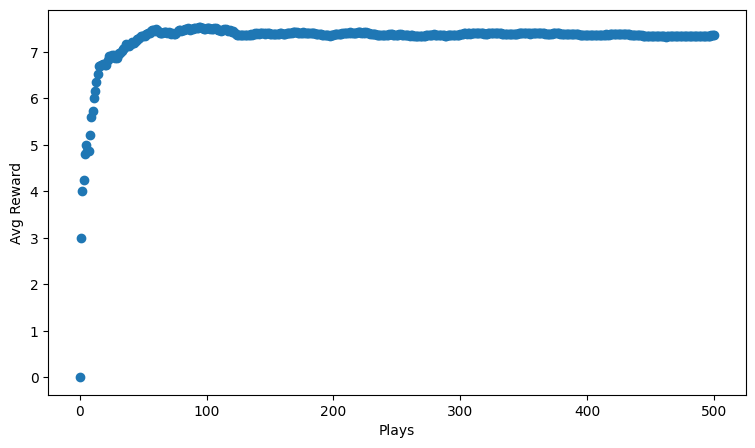

In [93]:
n = 10  # 动作的数量
probs = np.random.rand(n)  # 随机生成每个动作的真实奖励概率
record = np.zeros((n, 2))  # 用于记录每个动作的信息的数组，第一列存储次数，第二列存储平均奖励
fig, ax = plt.subplots(1, 1)  # 创建一个图形和坐标轴
ax.set_xlabel('Plays')  # 设置 x 轴标签为 "Plays"
ax.set_ylabel('Avg Reward')  # 设置 y 轴标签为 "Avg Reward"
fig.set_size_inches(9, 5)  # 设置图形的尺寸
rewards = [0]  # 存储每轮的平均奖励值，初始化为0

# 进行500轮的模拟
for i in range(500):
    p = softmax(record[:, 1])  # 使用 softmax 函数计算每个动作的选择概率
    choice = np.random.choice(np.arange(n), p=p)  # 根据给定的概率分布 p 随机选择一个元素。
    r = get_reward(probs[choice])  # 获取选择动作的奖励值
    record = update_record(record, choice, r)  # 更新记录数组，记录选择动作的信息
    mean_reward = ((i+1) * rewards[-1] + r) / (i+2)  # 计算当前轮的平均奖励值
    rewards.append(mean_reward)

# 绘制折线图，展示每轮的平均奖励值
ax.scatter(np.arange(len(rewards)), rewards)

In [94]:
import torch
torch.Tensor([[1,2,3], [4,5,6]])

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [95]:
import numpy
numpy.array([[1,2,3], [4,5,6]])

array([[1, 2, 3],
       [4, 5, 6]])

In [96]:
x = torch.tensor([2,4])
m = torch.randn(2, requires_grad=True) # parameter1
b = torch.randn(1, requires_grad=True) # parameter2
y = m*x+b   # linear model
loss = (torch.sum(y_known - y))**2  # loss function
m.grad

NameError: name 'y_known' is not defined

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(10, 150),   # 第一层：线性层，输入维度为 10，输出维度为 150
    torch.nn.ReLU(),            # 第一层后的激活函数：ReLU（整流线性单元）
    torch.nn.Linear(150, 4),    # 第二层：线性层，输入维度为 150，输出维度为 4
    torch.nn.ReLU(),            # 第二层后的激活函数：ReLU
)

loss_fn = torch.nn.MSELoss()    # 创建了一个均方误差损失函数对象 MSELoss，用于计算模型输出与目标之间的均方误差。在训练过程中，模型的目标是尽量减小这个损失函数的值。
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)    # 创建了一个Adam优化器对象，用于更新模型参数以最小化损失函数。

for step in range(100):
    y_pred = model(x)
    loss = loss_fn(y_pred, y_correct)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
from torch.nn import Module, Linear
import torch.nn.functional as F

class MyNet(Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = Linear(784, 50)  # 第一层线性层，输入维度为 784，输出维度为 50
        self.fc2 = Linear(50, 10)   # 第二层线性层，输入维度为 50，输出维度为 10
        
    def forward(self, x):
        x = F.relu(self.fc1(x))  # 使用ReLU激活函数处理第一层输出
        x = F.relu(self.fc2(x))  # 使用ReLU激活函数处理第二层输出
        return x

model = MyNet()  # 创建 MyNet 类的实例，即神经网络模型


In [ ]:
import numpy as np
import random

class ContextBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.init_distribution(arms)
        self.update_state()

    def init_distribution(self, arms):
        # Num states = Num Arms to keep things simple
        self.bandit_matrix = np.random.rand(arms, arms)
        # each row represents a state, each column an arm

    def reward(self, prob):
        reward = 0
        for i in range(self.arms):
            # Simulating reward based on probability
            if random.random() < prob:
                reward += 1
        return reward

    def get_state(self):
        # Get current state
        return self.state

    def update_state(self):
        # Update current state randomly
        self.state = np.random.randint(0, self.arms)

    def get_reward(self, arm):
        # Get reward for choosing a specific arm in the current state
        return self.reward(self.bandit_matrix[self.get_state()][arm])

    def choose_arm(self, arm):
        # Simulate choosing an arm, get reward, and update state
        reward = self.get_reward(arm)
        self.update_state()
        return reward
    

env = ContextBandit(arms = 10)
state = env.get_state()
reward = env.choose_arm(1)
print(state)
print(reward)

In [97]:
import numpy as np
import torch

# 定义神经网络模型
arms = 10
N, D_in, H, D_out = 1, arms, 100, arms
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.ReLU(),
)

# 定义均方误差损失函数
loss_fn = torch.nn.MSELoss()

# 创建上下文多臂赌博机环境
env = ContextBandit(arms=arms)

# 定义一个函数用于生成独热编码向量
def one_hot(N, pos, val=1):
    one_hot_vec = np.zeros(N)
    one_hot_vec[pos] = val
    return one_hot_vec

# 定义训练函数
def train(env, epochs=5000, learning_rate=1e-2):
    cur_state = torch.Tensor(one_hot(arms, env.get_state())) # 将当前状态转换为独热编码向量
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    rewards = []

    for i in range(epochs):
        y_pred = model(cur_state) # 神经网络前向传播得到预测值
        av_softmax = softmax(y_pred.data.numpy(), tau=2.0) # 计算softmax概率分布
        av_softmax /= av_softmax.sum() # 归一化概率分布
        choice = np.random.choice(arms, p=av_softmax) # 根据概率选择动作
        cur_reward = env.choose_arm(choice) # 执行选择的动作并得到奖励
        one_hot_reward = y_pred.data.numpy().copy() # 复制预测值作为独热编码奖励向量
        one_hot_reward[choice] = cur_reward # 将实际奖励值替换到对应位置
        reward = torch.Tensor(one_hot_reward)
        rewards.append(cur_reward)
        
        # 计算损失并进行反向传播优化
        loss = loss_fn(y_pred, reward)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        cur_state = torch.Tensor(one_hot(arms, env.get_state())) # 更新当前状态的独热编码表示

    return np.array(rewards)


##### 模型定义： 使用PyTorch定义了一个简单的前馈神经网络模型，包含两个线性层和ReLU激活函数。

##### 损失函数定义： 使用均方误差损失函数。
    
##### 环境初始化： 创建了一个上下文多臂赌博机环境。
    
##### 独热编码生成函数： one_hot 函数用于生成独热编码向量。
    
##### 训练函数定义： train 函数用于训练神经网络模型，实现了强化学习中的动作选择、奖励计算、损失计算和优化的过程。在训练过程中，模型通过反向传播来优化参数，以最小化预测值和实际奖励之间的均方误差。整个训练过程使用了softmax策略来选择动作。